- Student: Eduardo Jr Anala Morales
- Student: c0900536
- Lambton College

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./datasets/train.csv")

**Quick Data analysis and Data pre-processing**

In [66]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [68]:
df.describe()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [69]:
## Checking for null values in the dataset
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

**Handling of null values**
- We're using the mean of salary to fill null values in the dataset

In [70]:
## Fill null values with mean values
df["salary"].fillna(df["salary"].mean(), inplace=True)

In [71]:
## Confirm no more null values in the dataset
df.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

Based on our observations, there are categorical features that need to be converted to binary

In [72]:
## Check the value counts for each data with dtype as object type
## in preparation for Label encoding
for i in df.columns:
    if df[i].dtype == 'object':
        print(df[i].value_counts())

ssc_b
Central    116
Others      99
Name: count, dtype: int64
hsc_b
Others     131
Central     84
Name: count, dtype: int64
hsc_s
Commerce    113
Science      91
Arts         11
Name: count, dtype: int64
degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64
workex
No     141
Yes     74
Name: count, dtype: int64
specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64
status
Placed        148
Not Placed     67
Name: count, dtype: int64


**Label encoding for all the categorical features**
- This routine will parse through all the columns and filter out with dtype as object
- Then we will process them for label encoding

In [73]:
## Label encoding for categorical features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

lName = []
for i in df.columns:
    if df[i].dtype == 'object':
        lName.append(i+"_label")
        df[i+"_label"] = le.fit_transform(df[i])        

In [74]:
## Checking the value counts after the Label encoding
for i in range(len(lName)):
    print(df[lName[i]].value_counts())

ssc_b_label
0    116
1     99
Name: count, dtype: int64
hsc_b_label
1    131
0     84
Name: count, dtype: int64
hsc_s_label
1    113
2     91
0     11
Name: count, dtype: int64
degree_t_label
0    145
2     59
1     11
Name: count, dtype: int64
workex_label
0    141
1     74
Name: count, dtype: int64
specialisation_label
0    120
1     95
Name: count, dtype: int64
status_label
1    148
0     67
Name: count, dtype: int64


In [75]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,...,mba_p,status,salary,ssc_b_label,hsc_b_label,hsc_s_label,degree_t_label,workex_label,specialisation_label,status_label
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,...,58.80,Placed,270000.000000,1,1,1,2,0,1,1
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,...,66.28,Placed,200000.000000,0,1,2,2,1,0,1
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,...,57.80,Placed,250000.000000,0,0,0,0,0,0,1
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,...,59.43,Not Placed,288655.405405,0,0,2,2,0,1,0
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,...,55.50,Placed,425000.000000,0,0,1,0,0,0,1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sl_no                 215 non-null    int64  
 1   gender                215 non-null    int64  
 2   ssc_p                 215 non-null    float64
 3   ssc_b                 215 non-null    object 
 4   hsc_p                 215 non-null    float64
 5   hsc_b                 215 non-null    object 
 6   hsc_s                 215 non-null    object 
 7   degree_p              215 non-null    float64
 8   degree_t              215 non-null    object 
 9   workex                215 non-null    object 
 10  etest_p               215 non-null    float64
 11  specialisation        215 non-null    object 
 12  mba_p                 215 non-null    float64
 13  status                215 non-null    object 
 14  salary                215 non-null    float64
 15  ssc_b_label           2

Dropping all categorical features after successful Label encoding

In [77]:
## Drop the categorical features
for i in df.columns:
    if df[i].dtype == 'object':
        df.drop(i, axis=1, inplace=True)

In [78]:
df.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,ssc_b_label,hsc_b_label,hsc_s_label,degree_t_label,workex_label,specialisation_label,status_label
0,1,0,67.00,91.00,58.00,55.0,58.80,270000.000000,1,1,1,2,0,1,1
1,2,0,79.33,78.33,77.48,86.5,66.28,200000.000000,0,1,2,2,1,0,1
2,3,0,65.00,68.00,64.00,75.0,57.80,250000.000000,0,0,0,0,0,0,1
3,4,0,56.00,52.00,52.00,66.0,59.43,288655.405405,0,0,2,2,0,1,0
4,5,0,85.80,73.60,73.30,96.8,55.50,425000.000000,0,0,1,0,0,0,1


**Exploratory Data Analysis**

C:\Users\Jojo\AppData\Local\Temp\ipykernel_11044\2341405589.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


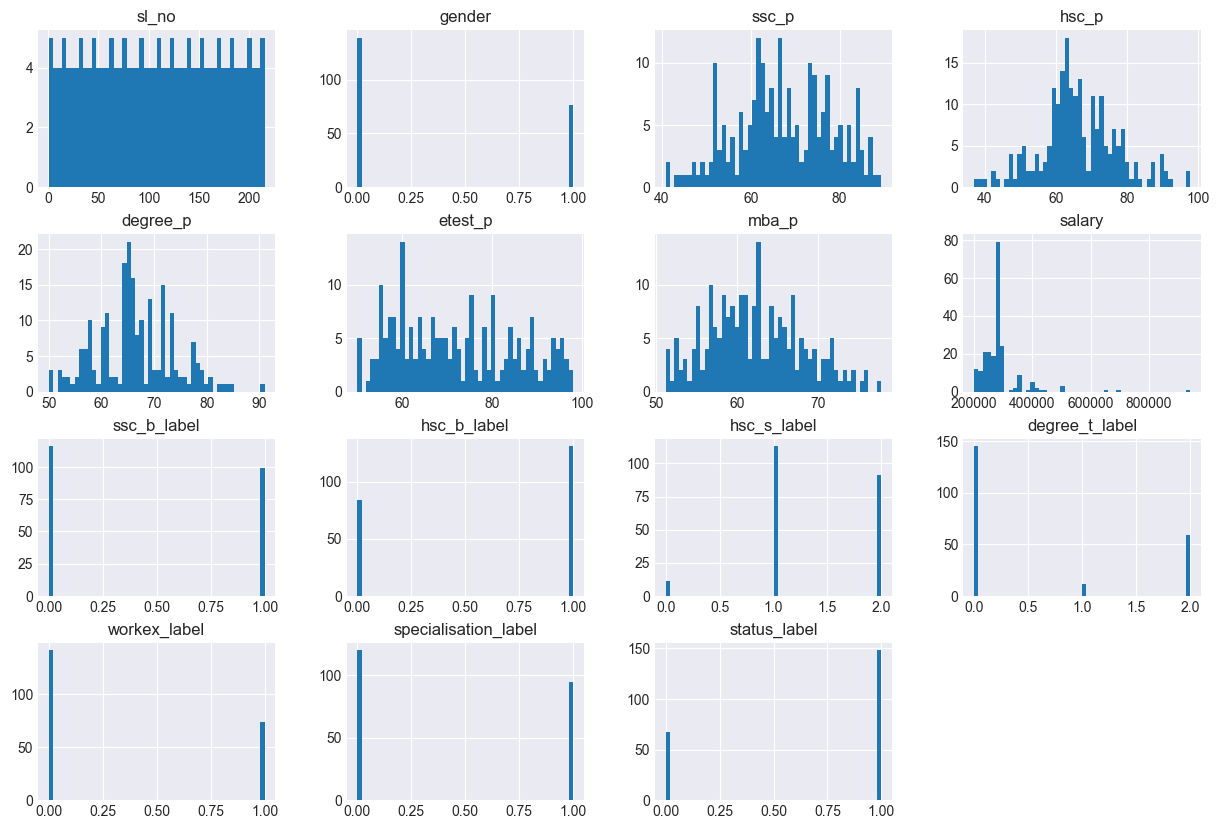

In [79]:
## Density plot for each column/feature
plt.style.use("seaborn-darkgrid")
df.hist(bins=50, figsize=(15,10))
plt.show()

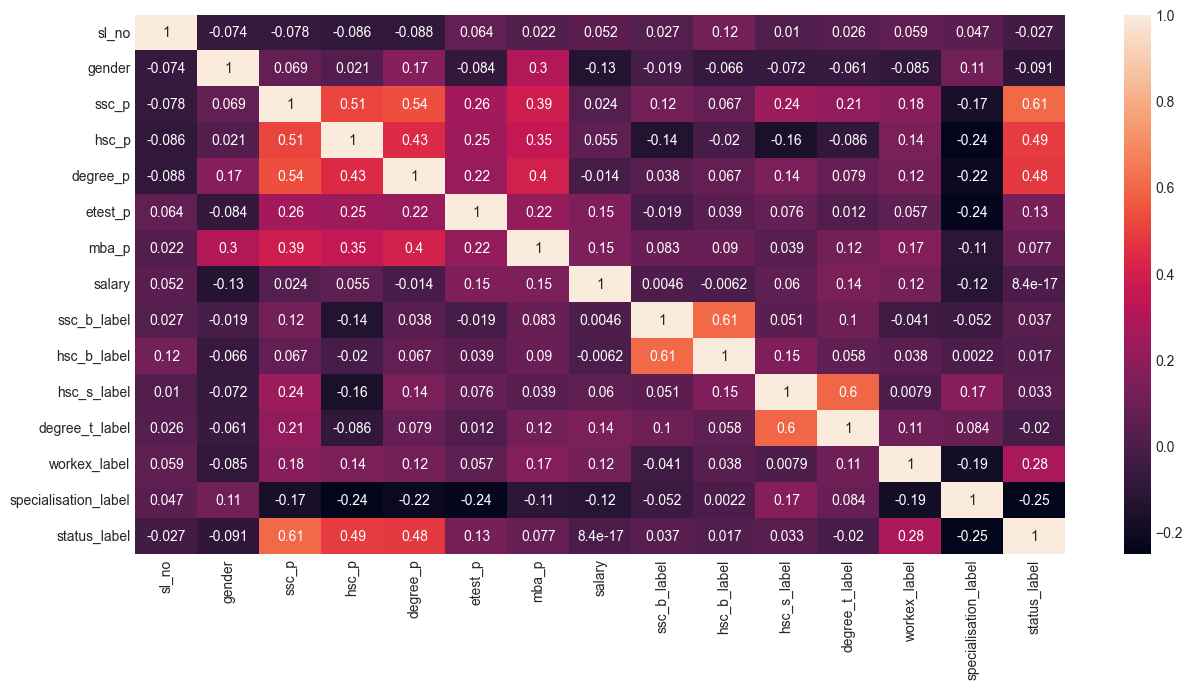

In [80]:
## Checking for correlation between the features using heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

**Split the data into X and y values**
- "status_label" is the target variable to predict if the student will be considered for placement or not

In [81]:
## Split the data into X and y values

X = df.drop("status_label", axis=1)

## Target variable
y = df["status_label"]
#X
#y


In [82]:
## Split the training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
X_train

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,ssc_b_label,hsc_b_label,hsc_s_label,degree_t_label,workex_label,specialisation_label
198,199,1,67.00,70.0,65.0,88.00,71.96,288655.405405,0,0,1,1,0,1
82,83,0,63.00,67.0,74.0,82.00,60.44,288655.405405,0,0,1,0,0,0
65,66,0,54.00,47.0,57.0,89.69,57.10,288655.405405,1,1,2,0,0,1
109,110,0,52.00,63.0,65.0,86.00,56.09,288655.405405,0,1,2,2,1,1
182,183,0,52.00,65.0,57.0,75.00,59.81,288655.405405,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,0,61.08,50.0,54.0,71.00,65.69,288655.405405,1,1,2,2,0,0
14,15,0,62.00,47.0,50.0,76.00,54.96,288655.405405,0,0,1,0,0,1
92,93,1,60.23,69.0,66.0,72.00,59.47,230000.000000,0,0,2,0,0,0
179,180,1,77.80,64.0,64.2,75.50,72.14,288655.405405,0,0,2,2,0,1


**We need to do normalization of features since the dataset have different scales**
- Specifically the "salary"

In [84]:
## We need to do normalization of features since the dataset have different scales
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [85]:
X_train

array([[ 1.44044853,  1.37281295, -0.03310727, ...,  0.46205492,
        -0.69652603,  1.08347268],
       [-0.37721805, -0.72843136, -0.39605926, ..., -0.6741457 ,
        -0.69652603, -0.92295821],
       [-0.64360022, -0.72843136, -1.21270123, ..., -0.6741457 ,
        -0.69652603,  1.08347268],
       ...,
       [-0.22052265,  1.37281295, -0.64740351, ..., -0.6741457 ,
        -0.69652603, -0.92295821],
       [ 1.14272728,  1.37281295,  0.9468631 , ...,  1.59825555,
        -0.69652603,  1.08347268],
       [-0.06382726,  1.37281295,  0.8742727 , ..., -0.6741457 ,
         1.43569652, -0.92295821]])

In [86]:
X_train.shape

(150, 14)

In [87]:
X_test

array([[ 1.47178761e+00, -7.28431359e-01,  1.48368723e-01,
        -5.37957383e-01, -1.11505904e-01,  1.13863418e+00,
        -1.63130045e+00,  1.24115934e-01,  1.04083300e+00,
         7.60885910e-01, -5.98535815e-01, -6.74145705e-01,
        -6.96526033e-01, -9.22958207e-01],
       [ 1.65982208e+00, -7.28431359e-01, -3.31072705e-02,
         8.60196975e-02,  9.54006794e-01, -1.04571089e+00,
         1.35224782e+00,  6.21757092e-02,  1.04083300e+00,
         7.60885910e-01, -5.98535815e-01, -6.74145705e-01,
         1.43569652e+00, -9.22958207e-01],
       [ 5.00276164e-01,  1.37281295e+00,  1.32796268e+00,
        -1.81399051e-01,  9.54006794e-01,  1.78513911e+00,
         1.71394350e+00, -4.95286314e-01,  1.04083300e+00,
         7.60885910e-01,  1.09543347e+00,  1.59825555e+00,
         1.43569652e+00, -9.22958207e-01],
       [ 1.09571866e+00,  1.37281295e+00, -7.59011247e-01,
        -5.37957383e-01, -1.31020769e+00, -1.35174872e+00,
        -7.33236541e-01, -8.66927662e-01, -9.

**We're using ANN for the 1st model**

In [88]:
## Build ANN model
import tensorflow as tf

## Ininitialized the model
ann = tf.keras.models.Sequential() 

In [89]:
## Create input layers and hidden layers, 24 for this case
ann.add(tf.keras.layers.Dense(units=24, activation="relu", input_shape=X_train.shape[1:]))

c:\Users\Jojo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [90]:
## Adding another hidden layer
ann.add(tf.keras.layers.Dense(units=12, activation="relu"))

In [91]:
## Adding output layer
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

**Train the ANN model**

In [92]:
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [93]:
## Observation = (# of records / batch size)
## Epoch, how may times you want run your model
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3405 - loss: 1.0733  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3493 - loss: 1.0425 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3586 - loss: 0.9277 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4017 - loss: 0.8856 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4453 - loss: 0.8196 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5272 - loss: 0.7381 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6021 - loss: 0.6927 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6392 - loss: 0.6572 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7217 - loss: 0.6273 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7200 - loss: 0.6072 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7428 - loss: 0.5627 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8056 - lo

In [94]:
y_pred = ann.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [95]:
y_pred

array([[0.99441063],
       [0.84282154],
       [0.99058694],
       [0.20667724],
       [0.99988705],
       [0.01612064],
       [0.02232886],
       [0.9921337 ],
       [0.9980296 ],
       [0.99987864],
       [0.89437324],
       [0.99607044],
       [0.02998346],
       [0.6804221 ],
       [0.99469274],
       [0.67482936],
       [0.99943376],
       [0.32686204],
       [0.2429511 ],
       [0.9980573 ],
       [0.9990232 ],
       [0.99990255],
       [0.18966079],
       [0.00327305],
       [0.9847856 ],
       [0.99978036],
       [0.78305435],
       [0.9868961 ],
       [0.9701586 ],
       [0.9810333 ],
       [0.96761775],
       [0.8076253 ],
       [0.81639034],
       [0.99011296],
       [0.9952666 ],
       [0.9945746 ],
       [0.5660426 ],
       [0.9397393 ],
       [0.9978875 ],
       [0.9956594 ],
       [0.99985427],
       [0.9888576 ],
       [0.9928459 ],
       [0.01153586],
       [0.9901997 ],
       [0.9994562 ],
       [0.9902935 ],
       [0.990

In [96]:
y_pred = (y_pred > 0.5).astype(int)
y_pred

array([[1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0]])

**Metrics for the 1st model using TensorFlow**

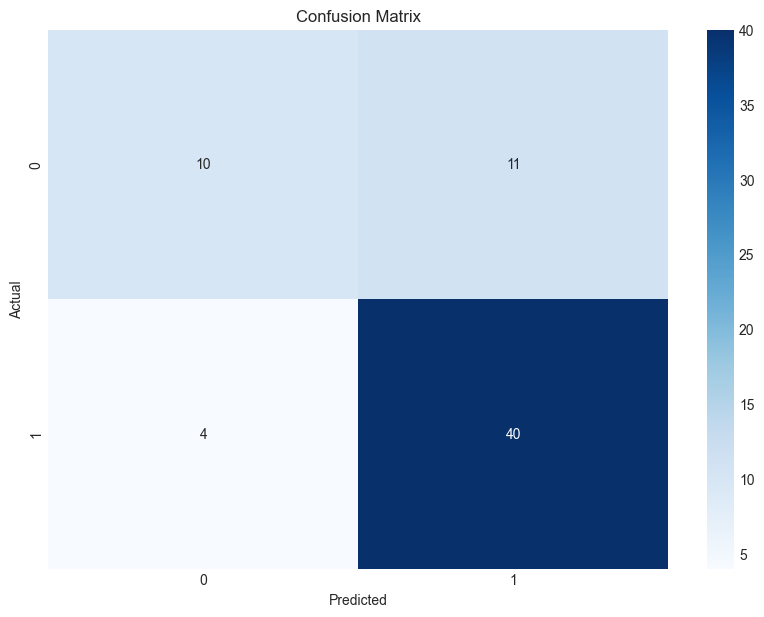

Accuracy Score : 0.7692307692307693


In [97]:
## Confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print (f"Accuracy Score : {accuracy_score(y_test, y_pred)}")

**Ensemble for the 2nd model**
- We're using Linear Regression, Lasso, ElasticNet, Ridge, DecisionTree and SVR

In [98]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

lr = LinearRegression()
ls = Lasso()
en = ElasticNet()
rd = Ridge()
dt = DecisionTreeRegressor()
svr = SVR(kernel="linear")

In [99]:
from sklearn.ensemble import VotingRegressor
ensemble_reg = VotingRegressor(estimators=[("lr", lr), ("ls", ls), ("en", en), ("rd",rd), ("dt", dt), ("svr", svr)])

In [100]:
ensemble_reg

VotingRegressor(estimators=[('lr', LinearRegression()), ('ls', Lasso()),
                            ('en', ElasticNet()), ('rd', Ridge()),
                            ('dt', DecisionTreeRegressor()),
                            ('svr', SVR(kernel='linear'))])

In [101]:
ensemble_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()), ('ls', Lasso()),
                            ('en', ElasticNet()), ('rd', Ridge()),
                            ('dt', DecisionTreeRegressor()),
                            ('svr', SVR(kernel='linear'))])

In [102]:
ensemble_reg.predict(X_test)

array([0.86033002, 0.79285509, 0.82243774, 0.57154664, 0.82125638,
       0.26081323, 0.37032141, 0.82557942, 0.89125441, 1.02502956,
       0.5223519 , 0.85919499, 0.41129743, 0.62115145, 0.96295215,
       0.44155213, 0.85108611, 0.47373395, 0.52867389, 0.95479169,
       0.93138956, 0.99826367, 0.44239993, 0.30789824, 0.83037172,
       0.94305135, 0.41784023, 0.78879455, 0.60015687, 0.82065644,
       0.84126261, 0.72367322, 0.66583688, 0.84167562, 0.80479076,
       0.84219042, 0.433985  , 0.6839412 , 0.87358102, 0.87282456,
       1.00384704, 0.80670354, 0.81922732, 0.38771283, 0.81131273,
       0.89400885, 0.8205327 , 0.8915867 , 0.7230746 , 0.99887304,
       0.88875525, 0.80438161, 0.84305077, 0.4653787 , 0.32719372,
       0.62688583, 0.5571012 , 0.80446744, 0.43303156, 1.04526306,
       0.5533565 , 0.54963682, 0.35310445, 0.61329782, 0.24001066])

**Metrics for 2nd model using ensemble**

In [103]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2 = r2_score(y_test, ensemble_reg.predict(X_test))
mse = mean_squared_error(y_test, ensemble_reg.predict(X_test))
mae = mean_absolute_error(y_test, ensemble_reg.predict(X_test))

print(f"R2 : {r2}")
print(f"MSE : {mse}")
print(f"MAE : {mae}")

R2 : 0.5654961212503218
MSE : 0.09502522697389412
MAE : 0.25897410495443707


**Let's check the score of the individual models**

In [104]:
for name, model in ensemble_reg.named_estimators_.items():
    print(name, model.score(X_train, y_train))

lr 0.5841985754265853
ls 0.0
en 0.0
rd 0.5841654025165437
dt 1.0
svr 0.5682630771124284


**Using RandomForest model to check out the result**

In [105]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=80, max_samples=0.8, max_depth=12)
rf.fit(X_train, y_train)
rf.predict(X_test)

array([0.9625, 0.9625, 0.875 , 0.9375, 1.    , 0.    , 0.0125, 1.    ,
       0.9875, 0.975 , 0.4   , 1.    , 0.    , 0.1125, 1.    , 0.2625,
       0.5375, 0.2125, 0.4625, 1.    , 0.9625, 1.    , 0.5125, 0.0125,
       0.95  , 1.    , 0.1375, 0.925 , 0.5   , 0.925 , 0.8625, 0.9875,
       0.925 , 1.    , 0.975 , 0.8875, 0.2   , 0.9625, 0.975 , 1.    ,
       1.    , 0.9875, 1.    , 0.    , 1.    , 1.    , 1.    , 0.9125,
       0.9625, 0.825 , 1.    , 0.95  , 0.875 , 0.25  , 0.    , 0.15  ,
       0.875 , 1.    , 0.4   , 1.    , 0.3   , 0.1   , 0.    , 0.975 ,
       0.0125])

In [106]:
r2 = r2_score(y_test, rf.predict(X_test))
r2

0.8692217938311688

## Conclusion

- The ANN model performed with an accuracy of 76% but this will improve over time as it learns more data
- While from the ensemble, DT performed well with 100% accuracy
- Random forest performed better than ANN with accuracy of 87%